In [1]:
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import mpl_finance as mpf
import talib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

[Getting data:]###

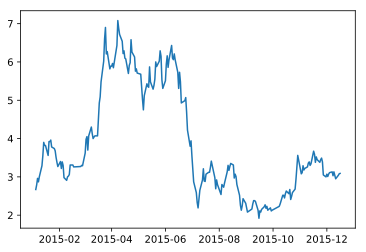

In [19]:
data = ts.get_h_data('002337', start='2015-01-01', end='2015-12-16') #两个日期之间的前复权数据
plt.plot(data['close'])

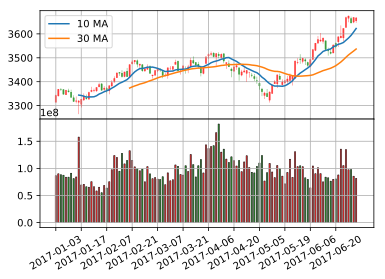

In [6]:
data = ts.get_k_data('399300', index=True, start='2017-01-01', end='2017-06-31')
#计算10日、30日均线
sma_10 = talib.SMA(np.array(data['close']), 10)
sma_30 = talib.SMA(np.array(data['close']), 30)
#生成同享X轴的子图（Create a figure and a set of subplots），返回一个figure对象和两个axes轴对象
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
#设置两个轴的比例,否则k线和成交量两个子图大小相同
# ax = fig.add_axes([0,0.2,1,0.5])
# ax2 = fig.add_axes([0,0,1,0.2])
#第一个轴ax:画蜡烛图，10、30日均线
mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'], 
                      width=0.5, colorup='r', colordown='g', alpha=0.6)
ax.set_xticklabels(data['date'][::10])
ax.plot(sma_10, label='10 MA')
ax.plot(sma_30, label='30 MA') #Moving Average
ax.legend(loc='upper left')
ax.grid(True)
#第二个轴ax2:画成交量
mpf.volume_overlay(ax2, data['open'], data['close'], data['volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(data['date']), 10))
ax2.set_xticklabels(data['date'][::10], rotation=30)
ax2.grid(True)
plt.subplots_adjust(hspace=0)
plt.show()

In [7]:
df = ts.get_h_data('002337', start='2015-01-01', end='2017-01-01')
df.to_csv('/Users/wangxiaobin/Documents/git&hexo_blog/source/_posts/股价绘图以及SVM-SVR策略/002337.csv')

[Getting data:]########

In [18]:
import pandas as pd
import os

def loadDataSetByPandas(filesname):
	'''read csv files to a DataFrame
	Args:
		the list of the files
	Returns:
		merge all the files' data into a DataFrame exclude the rows 0
	'''
	dataFrame = pd.DataFrame()
	for f in filesname:
		dataFrame = dataFrame.append(pd.read_csv(f,header=0),ignore_index=True) #列名设为第0行,忽略index重复名
	dataFrame = dataFrame[(dataFrame['amount']>0) & (dataFrame['volume']>0)]	#处理缺失值0
	return dataFrame

def listcsvFiles(_filepath):
	''' list .csv files in specific filepath
	Args:
		_filepath: The path to list
	Returns:
		a list combined by the .csv file name under the path
	'''
	filecsv_list=[]
	os.chdir(_filepath)
	for root, dir, files in os.walk(_filepath):
		for f in files:
			if os.path.splitext(f)[1] == '.csv':
				filecsv_list.append(f) 
	return filecsv_list


def count(_dataFrame):
	'''统计DataFrame中label分别为1或-1的个数（要有好的分类效果，-1和1的个数最好持平）
		Args:
		Returns -> tuple: 例如：
	return	  1414, 1514
	label:	  	1 ,  -1			
	'''
	res = 0,0
	minus1 = _dataFrame[_dataFrame['label'] == -1]
	plus1 = _dataFrame[_dataFrame['label'] == 1]
	res = len(minus1),len(plus1)
	return res

def add_label(_dataFrame):
	df = _dataFrame
	df['Amt_div_Vol'] = df['amount'] / df['volume']    #给df增加一列Amt_div_Vol
	df['label'] = (df['high'].shift(1)- df['low']) / df['close']    #增加一列label
	df['label'] = df['label'].apply(lambda x : 1 if x >= 0.03  else -1) #修改label的值

	'''
	选取amt,volume,amt_div_vol作为三个特征，
	label作为分类的标志
	'''
	df = df[['label','amount','volume','Amt_div_Vol']]
	return df

if __name__ == '__main__':
	root_dir = '/Users/wangxiaobin/Documents/git&hexo_blog/source/_posts/股价绘图以及SVM-SVR策略'
	svm_train_dir = '/Users/wangxiaobin/Documents/git&hexo_blog/source/_posts/股价绘图以及SVM-SVR策略'
	# svm_test_dir = '/Users/wangxiaobin/Desktop/大二下创新实践/作业4/作业4 Libsvm-股票数据分析/svm_test'

	filecsv_list = listcsvFiles(root_dir)
	df = loadDataSetByPandas(filecsv_list)
	df = add_label(df)
	df.to_csv('data_by_pandas.csv',header=None,index=None)

	# svmtrain_list = listcsvFiles(svm_train_dir)
	# df_train = loadDataSetByPandas(svmtrain_list)
	# train = add_label(df_train)
	# train.to_csv('svm_train.csv',header=None,index=None)
	
	# svmtest_list = listcsvFiles(svm_test_dir)
	# df_test = loadDataSetByPandas(svmtest_list)
	# test = add_label(df_test)
	# test.to_csv('svm_test.csv',header=None,index=None)